# Cours fouille de données : Graphes et Réseaux
## 16 décembre 2019

# Premiers pas, construction de graphe

In [1]:
from networkx import * 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

*NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.*

In [2]:
G=Graph()# construit un graphe qui, initialement, ne contient ni noeud ni arretes

In [3]:
G.add_node('Rouge') #on peut ajouter des noeuds
G.add_node('Jaune') #N'importe quel objet Python peut-etre un noeud. 
G.add_node('Vert')  #Ici, on a choisi des chaînes de caractères
G.add_node('Bleu')

In [4]:
len(G)

4

In [5]:
G.add_edge('Rouge','Jaune') #on peut ajouter des liens
G.add_edge('Rouge','Jaune')
G.add_edge('Rouge','Bleu')
G.add_edge('Jaune','Bleu')
G.add_edge('Jaune','Vert')
G.add_edge('Jaune','Vert')
G.add_edge('Bleu','Vert')

In [6]:
G['Bleu']

AtlasView({'Rouge': {}, 'Jaune': {}, 'Vert': {}})

In [7]:
G.degree()

DegreeView({'Rouge': 2, 'Jaune': 3, 'Vert': 2, 'Bleu': 3})

Entre deux sommets d'un graphe de NetworkX, il ne peut y avoir qu'un seul lien tout au plus. 

En fait, quand on accepte des liens parallèles, on parle plutot de multigraphe. NetworkX propose une classe [MultiGraph](https://networkx.github.io/documentation/stable/reference/classes/multigraph.html))

Les graphes de NetworkX sont non-orientés (mais NetworkX propose une classe [DiGraph](https://networkx.github.io/documentation/stable/reference/classes/digraph.html)): 

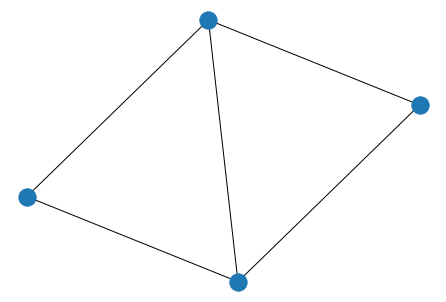

In [8]:
draw(G)

# Le modèle d'Erdös-Renyi : graphes aléatoires

## Composantes connexes

Ce graphe a 1 composantes connexes


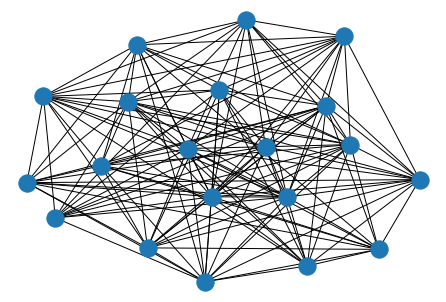

In [9]:
G=erdos_renyi_graph(20,.75)
nComposantesConnexes=number_connected_components(G)
print("Ce graphe a %d composantes connexes"%nComposantesConnexes)
nx.draw(G)

Ce graphe a 7 composantes connexes


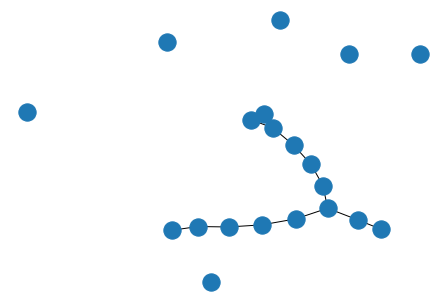

In [10]:
G=erdos_renyi_graph(20,.1)
nComposantesConnexes=number_connected_components(G)
print("Ce graphe a %d composantes connexes"%nComposantesConnexes)
nx.draw(G)

Quel est le seuil pour $p$ à partir duquel on devient quasiment sur d'avoir 1 seule composante connexe ?

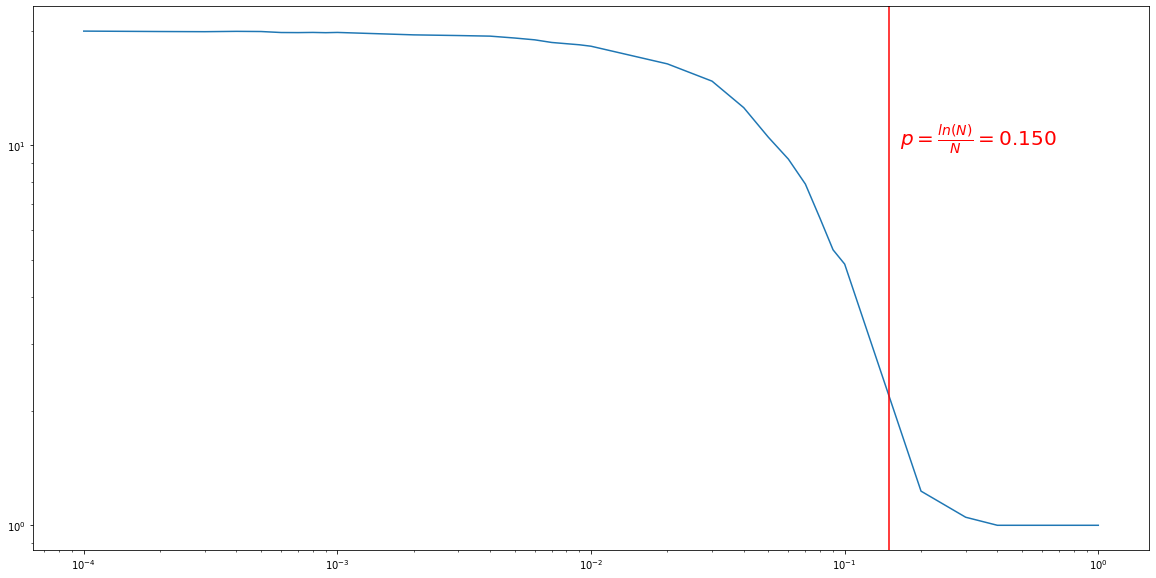

In [11]:
N=20
nombreDEssais=100
ps=list(np.arange(.0001,.001,.0001))+list(np.arange(.001,.01,.001))+list(np.arange(.01,.1,.01))+list(np.arange(.1,1.1,.1))
nombreDeComposantesConnexes={}
for p in ps:  
    nombreDeComposantesConnexes[p]=[]
    for i in range(nombreDEssais):
        nombreDeComposantesConnexes[p].append(nx.number_connected_components(erdos_renyi_graph(N,p)))
nombreDeComposantesConnexes={p:np.mean(ns) for p,ns in nombreDeComposantesConnexes.items()}   
plt.figure(figsize=(20,10))
plt.loglog(list(nombreDeComposantesConnexes.keys()), list(nombreDeComposantesConnexes.values()))
plt.axvline(np.log(N)/N, color='r')
plt.text(1.1*np.log(N)/N, 10, r'$p=\frac{ln(N)}{N}=%.3f$'%(np.log(N)/N), size=20, color='r');

## Nombre d'arrêtes dans le graphe

In [12]:
N=20
p=.1
G=erdos_renyi_graph(N,p)
nbArretesAttendu = p*N*(N-1)/2
nbArretesObservé = G.number_of_edges()
print('on attend %d arrêtes, on en observe %d'%(nbArretesAttendu,nbArretesObservé))

on attend 19 arrêtes, on en observe 15


In [13]:
nombreDEssais=10000
nbArretesObservé=[]
for i in range(nombreDEssais):
    G=erdos_renyi_graph(N,p)
    nbArretesObservé.append(G.number_of_edges())

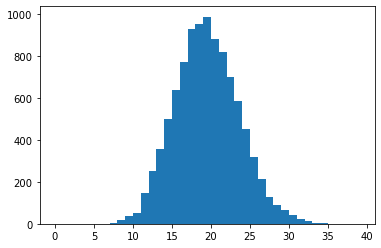

In [14]:
plt.hist(nbArretesObservé, bins=range(40));

## Degré moyen

In [15]:
N=1000
p=.1
G=erdos_renyi_graph(N,p)
degrés=[deg for node, deg in G.degree()]
degrés=list(dict(G.degree()).values())

(array([  2.,  19.,  65., 159., 301., 238., 152.,  49.,  14.,   1.]),
 array([ 66. ,  72.9,  79.8,  86.7,  93.6, 100.5, 107.4, 114.3, 121.2,
        128.1, 135. ]),
 <a list of 10 Patch objects>)

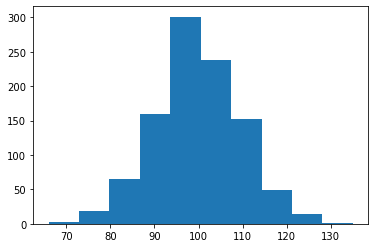

In [16]:
plt.hist(degrés)